# EDA

## First look at the data

In [1]:
import pandas as pd

In [188]:
# Import data as DataFrames

listings = pd.read_csv('Data/listings.csv.gz')
listings_ = pd.read_csv('Data/listings.csv')
neighbor = pd.read_csv('Data/neighbourhoods.csv')
reviews = pd.read_csv('Data/reviews.csv')
calendar = pd.read_csv('Data/calendar.csv.gz')

listings1 = pd.read_csv('Data/listings (1).csv.gz')

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [190]:
# Check the difference in listings and listings_

for i in list(listings_.columns):
    if i in list(listings.columns):
        pass
    else:
        print(i)

# All the information in listings_ is in listings except 'neighbourhood_group'
# neighbourhood_group column gives vague information - i.e., Manhattan, Brooklyn, Queens

# Use listings instead of listings_

neighbourhood_group


In [192]:
neighbor.head()

# Associates specific neighborhoods (i.e., Allerton) with neighborhood_group (i.e., Five Boroughs)

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [197]:
reviews.head()

# Dates each review was made - doesn't seem too useful

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25


In [196]:
calendar.head()

# Booking status for each data with prices and min/max nights

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,63320,2020-12-11,t,$45.00,$45.00,30.0,365.0
1,30031,2020-12-11,f,$49.00,$49.00,30.0,30.0
2,30031,2020-12-12,f,$49.00,$49.00,30.0,30.0
3,30031,2020-12-13,f,$49.00,$49.00,30.0,30.0
4,30031,2020-12-14,f,$49.00,$49.00,30.0,30.0


In [198]:
listings_1.head()

# Listings information from January 3, 2020
# First case of COVID-19 in the USA was January 20, 2020

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200103021948,2020-01-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20200103021948,2020-01-04,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.65
2,5099,https://www.airbnb.com/rooms/5099,20200103021948,2020-01-03,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.60
3,5121,https://www.airbnb.com/rooms/5121,20200103021948,2020-01-04,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39
4,5178,https://www.airbnb.com/rooms/5178,20200103021948,2020-01-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.53


In [199]:
for i in list(listings_1.columns):
    if i in list(listings.columns):
        pass
    else:
        print(i)

summary
space
experiences_offered
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
xl_picture_url
street
city
state
zipcode
market
smart_location
country_code
country
is_location_exact
bed_type
square_feet
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
requires_license
jurisdiction_names
is_business_travel_ready
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification


In [200]:
for i in list(listings.columns):
    if i in list(listings_1.columns):
        pass
    else:
        print(i)

bathrooms_text
number_of_reviews_l30d


## Filtering and grouping columns

### Process

All 70+ features were 

In [249]:
# Store all host-related columns in a separate DataFrame
host_cols = ['host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
host_listings = listings[host_cols]
listings = listings.drop(host_cols, axis=1)

KeyError: "None of [Index(['host_id', 'host_url', 'host_name', 'host_since', 'host_location',\n       'host_about', 'host_response_time', 'host_response_rate',\n       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',\n       'host_picture_url', 'host_neighbourhood', 'host_listings_count',\n       'host_total_listings_count', 'host_verifications',\n       'host_has_profile_pic', 'host_identity_verified',\n       'calculated_host_listings_count',\n       'calculated_host_listings_count_entire_homes',\n       'calculated_host_listings_count_private_rooms',\n       'calculated_host_listings_count_shared_rooms'],\n      dtype='object')] are in the [columns]"

In [304]:
keep_host = ['host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
             'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',]
delete_host = ['host_url', 'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
               'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
text_host = ['host_name', 'host_about', 'host_verifications']

host_listings.drop(keep_host + delete_host + text_host, axis=1).head()

""
0
1
2
3
4


In [296]:
# Delete columns that contain data that does not have any value when predicting

keep = ['id', 'name', 'description', 'neighborhood_overview', 'neighbourhood_cleansed', 
        'property_type', 'room_type', 'accommodates','bathrooms_text', 'bedrooms', 
        'beds', 'amenities', 'price', 'minimum_nights','availability_30', 'availability_60', 
        'availability_90', 'availability_365', 'number_of_reviews', 'last_review', 
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
        'review_scores_value', 'license', 'instant_bookable', 'reviews_per_month']
delete = ['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'neighbourhood',
          'latitude', 'longitude', 'neighbourhood_group_cleansed', 'bathrooms', 
          'maximum_nights', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 
          'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
          'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
          'calendar_last_scraped', 'first_review', 'license', 'number_of_reviews_ltm', 'number_of_reviews_l30d']

listings.drop(keep + delete, axis=1) # checking each column that were not classified yet 

""
0
1
2
3
4
...
36918
36919
36920
36921


In [252]:
filtered_listings_ = listings.drop(delete, axis=1)

In [253]:
filtered_listings_.columns

Index(['id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [250]:
# Further filtering of data, along with some classification

keep1 = ['room_type', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'instant_bookable',
        'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365']
text = ['name', 'description', 'neighborhood_overview', 'amenities']  
review = ['number_of_reviews', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']

filtered_listings_.drop(keep1 + text + review, axis=1)

""
0
1
2
3
4
...
36918
36919
36920
36921


In [314]:
keep_review = []
delete_review = ['reviews_per_month']

filtered_listings_[review].drop(keep_review + delete_review, axis=1).head()

,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,48,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0
1,375,2020-11-22,89.0,9.0,9.0,9.0,9.0,10.0,10.0
2,50,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0
3,474,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0
4,118,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0


In [254]:
filtered_listings = filtered_listings_.drop(text + review, axis=1)

In [255]:
filtered_listings.head()  # Condensed data after two rounds of filtering

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,instant_bookable
0,2595,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$175.00,30,60,90,365,f
1,3831,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$74.00,12,31,61,307,f
2,5121,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,60,90,365,f
3,5178,Midtown,Private room in apartment,Private room,2,1 bath,1.0,1.0,$65.00,0,0,0,0,f
4,5203,Upper West Side,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,$75.00,0,0,0,0,f


In [59]:
filtered_listings.room_type.value_counts()  # Room type is perhaps the most important, especially during COVID-19

Entire home/apt    19470
Private room       16478
Shared room          678
Hotel room           297
Name: room_type, dtype: int64

### Columns

In [350]:
more_delete = ['reviews_per_month', 'host_since', 'host_acceptance_rate', 'beds']

combined_delete = delete_host + delete + more_delete
combined_text = text_host + text  # perhaps include text in further studies
omit = combined_delete + combined_text
len(omit)

46

In [ ]:
# make an omitting function (omitter)
# when appending or deleting it gives error if the previous arguments have been already deleted/omitted
# use a for loop containing 'try' to avoid this problem

In [310]:
raw_listings = pd.read_csv('Data/listings.csv.gz')

In [318]:
len(raw_listings)

36923

In [351]:
len(raw_listings.columns)

74

In [352]:
len(raw_listings.columns) - len(omit) - 6

22

In [353]:
raw_listings.drop(omit, axis=1).head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92%,f,6.0,t,t,Midtown,Entire apartment,...,48,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f
1,3831,4869,within an hour,95%,f,1.0,t,t,Clinton Hill,Entire guest suite,...,375,2020-11-22,89.0,9.0,9.0,9.0,9.0,10.0,10.0,f
2,5121,7356,NaN,NaN,f,1.0,t,t,Bedford-Stuyvesant,Private room in apartment,...,50,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f
3,5178,8967,within a day,100%,f,1.0,t,f,Midtown,Private room in apartment,...,474,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,f
4,5203,7490,NaN,NaN,f,1.0,t,t,Upper West Side,Private room in apartment,...,118,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [354]:
raw_listings.drop(omit, axis=1).isna().sum()

id                                 0
host_id                            0
host_response_time             17500
host_response_rate             17500
host_is_superhost                  9
host_listings_count                9
host_has_profile_pic               9
host_identity_verified             9
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    93
bedrooms                        3588
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
last_review                     9384
review_scores_rating           10108
review_scores_accuracy         10130
review_scores_cleanliness      10119
review_scores_checkin          10143
review_scores_communication    10128
review_scores_location         10145
r

In [346]:
raw_listings.host_response_rate.value_counts()

100%    12185
0%       1053
90%       908
99%       525
98%       447
        ...  
65%         2
55%         2
72%         2
42%         1
16%         1
Name: host_response_rate, Length: 68, dtype: int64

In [347]:
raw_listings.bedrooms.value_counts()

# There is no 0 bedroom
# NaN is probably something like a studio
# Replace NaN with 0

1.0     25996
2.0      5124
3.0      1587
4.0       452
5.0       110
6.0        31
8.0        14
7.0        11
10.0        3
9.0         3
14.0        1
13.0        1
21.0        1
11.0        1
Name: bedrooms, dtype: int64

In [349]:
raw_listings.beds.value_counts()

1.0     22704
2.0      7697
3.0      2687
0.0      1394
4.0      1146
5.0       394
6.0       205
7.0        83
8.0        53
9.0        29
12.0       16
10.0       16
11.0        9
13.0        4
16.0        2
14.0        2
24.0        1
18.0        1
42.0        1
17.0        1
21.0        1
Name: beds, dtype: int64

In [330]:
raw_listings[review].loc[raw_listings[review]['number_of_reviews'] != 0].isna().sum()

number_of_reviews                0
last_review                      0
review_scores_rating           724
review_scores_accuracy         746
review_scores_cleanliness      735
review_scores_checkin          759
review_scores_communication    744
review_scores_location         761
review_scores_value            761
reviews_per_month                0
dtype: int64

In [331]:
raw_listings[review].loc[raw_listings[review]['number_of_reviews'] != 0].describe()

# 50th percentile of reviews in all categories are 10/10
# reviews should be made categorical, as being no reviews, reviews below 10/10, and reviews with 10/10.
# For number of reviews, perhaps use quartiles as the standard for categorizing.

# Perhaps replace null values in review categories as 10/10, since no complaints may mean it was good enough.
# The assumption is that, people would usually give 10/10 if they did not find anything that was particularly bothering to them
# Satisfactory / Unsatisfactory

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,27539.000000,26815.000000,26793.000000,26804.000000,26780.000000,26795.000000,26778.000000,26778.000000,27539.000000
mean,31.081739,93.812903,9.590789,9.269960,9.722517,9.718343,9.602435,9.373852,0.892762
std,53.405071,9.521463,0.935542,1.143226,0.824107,0.849136,0.791134,1.002264,1.305804
min,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,3.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.110000
50%,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.370000
75%,34.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.170000
max,748.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.280000


In [336]:
raw_listings.host_response_time.value_counts()

within an hour        10353
within a few hours     4135
within a day           3248
a few days or more     1687
Name: host_response_time, dtype: int64

## Preparing data for modelling

### Listings

In [380]:
data = raw_listings.drop(omit, axis=1)

In [408]:
data.isna().sum()

id                                 0
host_id                            0
host_response_time                 0
host_response_rate                 0
host_is_superhost                  0
host_listings_count                9
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    93
bedrooms                           0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
last_review                     9384
review_scores_rating           10108
review_scores_accuracy         10130
review_scores_cleanliness      10119
review_scores_checkin          10143
review_scores_communication    10128
review_scores_location         10145
r

In [382]:
data.host_response_time.fillna('did not contact host', inplace=True)

In [388]:
[data[data.host_response_rate.notnull()].host_response_rate.map(lambda x: int(x[:-1])).mean(),
 data[data.host_response_rate.notnull()].host_response_rate.map(lambda x: int(x[:-1])).median(),
 data[data.host_response_rate.notnull()].host_response_rate.map(lambda x: int(x[:-1])).mode()]

[87.64001441589868, 100.0, 0    100
 dtype: int64]

In [389]:
raw_listings.host_response_rate.value_counts()

# NaN probably means that the client did not contact the host
# Since there was no need to contact host, it means the client was satisfied with the provided information in the posting
# Consider this as the same as 100% response rate.

100%    12185
0%       1053
90%       908
99%       525
98%       447
        ...  
65%         2
55%         2
72%         2
42%         1
16%         1
Name: host_response_rate, Length: 68, dtype: int64

In [395]:
data.host_response_rate.fillna('100%', inplace=True)

In [399]:
data.host_response_rate = data.host_response_rate.map(lambda x: int(x[:-1]))

In [379]:
data.host_response_rate.map(lambda x: x[:-1])

0         92
1         95
2           
3        100
4           
        ... 
36918    100
36919       
36920       
36921    100
36922     98
Name: host_response_rate, Length: 36923, dtype: object

In [427]:
data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92,0,6.0,1,1,Midtown,Entire apartment,...,48,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0
1,3831,4869,within an hour,95,0,1.0,1,1,Clinton Hill,Entire guest suite,...,375,2020-11-22,89.0,9.0,9.0,9.0,9.0,10.0,10.0,0
2,5121,7356,did not contact host,100,0,1.0,1,1,Bedford-Stuyvesant,Private room in apartment,...,50,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0
3,5178,8967,within a day,100,0,1.0,1,0,Midtown,Private room in apartment,...,474,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,0
4,5203,7490,did not contact host,100,0,1.0,1,1,Upper West Side,Private room in apartment,...,118,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,within an hour,100,0,10.0,1,1,Kips Bay,Entire apartment,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36919,46937954,287807769,did not contact host,100,0,0.0,1,1,Upper West Side,Entire apartment,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36920,46938514,303319010,did not contact host,100,1,0.0,1,1,East Harlem,Shared room in apartment,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36921,46938537,3351317,within a few hours,100,0,1.0,1,1,Kips Bay,Entire apartment,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [402]:
binary = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

In [405]:
for col in binary:
    data[col] = data[col].map(lambda x: make_int(x))

In [407]:
data.bedrooms.fillna(0, inplace=True)

In [428]:
data = data[data.host_listings_count.notnull() & data.bathrooms_text.notnull()]

In [429]:
data.isna().sum()

id                                 0
host_id                            0
host_response_time                 0
host_response_rate                 0
host_is_superhost                  0
host_listings_count                0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     0
bedrooms                           0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
last_review                     9327
review_scores_rating           10048
review_scores_accuracy         10070
review_scores_cleanliness      10059
review_scores_checkin          10083
review_scores_communication    10068
review_scores_location         10085
r

In [430]:
data.iloc[:, 19:28].loc[data['last_review'].isna()].number_of_reviews.value_counts()

0    9327
Name: number_of_reviews, dtype: int64

In [434]:
no_rating_index = data.iloc[:, 19:28].loc[data['last_review'].isna()].index
no_rating_index

Int64Index([    7,    10,    18,   113,   120,   126,   167,   173,   232,
              233,
            ...
            36913, 36914, 36915, 36916, 36917, 36918, 36919, 36920, 36921,
            36922],
           dtype='int64', length=9327)

In [450]:
data.loc[no_rating_index] = data.loc[no_rating_index].fillna('None')

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [452]:
data.fillna('10.0', inplace=True)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [454]:
data.isna().sum()

id                             0
host_id                        0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
price                          0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [456]:
data.last_review.map(lambda x: x[:4]).value_counts()

2020    14892
None     9327
2019     5541
2018     2391
2017     1773
2016     1748
2015      963
2014      135
2013       33
2012       14
2011        3
2010        1
Name: last_review, dtype: int64

In [457]:
data.last_review = data.last_review.map(lambda x: x[:4])

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [477]:
data.review_scores_rating.loc[data['review_scores_rating'] != 'None'] = \
data.review_scores_rating.loc[data['review_scores_rating'] != 'None'].map(lambda x: int(round(float(x))))

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [480]:
data.review_scores_rating.loc[data['review_scores_rating'] != 'None'].loc[['review_scores_rating'] > 97]

TypeError: '>' not supported between instances of 'list' and 'int'

In [509]:
data.review_scores_rating.loc[data['review_scores_rating'] == 'None'] = -1
data.review_scores_accuracy.loc[data['review_scores_accuracy'] == 'None'] = -1
data.review_scores_cleanliness.loc[data['review_scores_cleanliness'] == 'None'] = -1
data.review_scores_checkin.loc[data['review_scores_checkin'] == 'None'] = -1
data.review_scores_communication.loc[data['review_scores_communication'] == 'None'] = -1
data.review_scores_location.loc[data['review_scores_location'] == 'None'] = -1
data.review_scores_value.loc[data['review_scores_value'] == 'None'] = -1

data.last_review.loc[data['last_review'] == 'None'] = -1

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython ke

In [510]:
data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92,0,6.0,1,1,Midtown,Entire apartment,...,48,2019,94,9,9,10,10,10,9,0
1,3831,4869,within an hour,95,0,1.0,1,1,Clinton Hill,Entire guest suite,...,375,2020,89,9,9,9,9,10,10,0
3,5178,8967,within a day,100,0,1.0,1,0,Midtown,Private room in apartment,...,474,2020,84,9,8,9,9,10,9,0
4,5203,7490,did not contact host,100,0,1.0,1,1,Upper West Side,Private room in apartment,...,118,2017,98,10,10,10,10,10,10,0
5,5803,9744,within a few hours,90,1,3.0,1,1,South Slope,Private room in townhouse,...,182,2020,94,10,10,10,10,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,within an hour,100,0,10.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36919,46937954,287807769,did not contact host,100,0,0.0,1,1,Upper West Side,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36920,46938514,303319010,did not contact host,100,1,0.0,1,1,East Harlem,Shared room in apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36921,46938537,3351317,within a few hours,100,0,1.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0


In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 36922
Data columns (total 29 columns):
id                             36821 non-null int64
host_id                        36821 non-null int64
host_response_time             36821 non-null object
host_response_rate             36821 non-null int64
host_is_superhost              36821 non-null int64
host_listings_count            36821 non-null float64
host_has_profile_pic           36821 non-null int64
host_identity_verified         36821 non-null int64
neighbourhood_cleansed         36821 non-null object
property_type                  36821 non-null object
room_type                      36821 non-null object
accommodates                   36821 non-null int64
bathrooms_text                 36821 non-null object
bedrooms                       36821 non-null float64
price                          36821 non-null object
availability_30                36821 non-null int64
availability_60                36821 non-null int

In [517]:
data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92,0,6.0,1,1,Midtown,Entire apartment,...,48,2019,94,9,9,10,10,10,9,0
1,3831,4869,within an hour,95,0,1.0,1,1,Clinton Hill,Entire guest suite,...,375,2020,89,9,9,9,9,10,10,0
3,5178,8967,within a day,100,0,1.0,1,0,Midtown,Private room in apartment,...,474,2020,84,9,8,9,9,10,9,0
4,5203,7490,did not contact host,100,0,1.0,1,1,Upper West Side,Private room in apartment,...,118,2017,98,10,10,10,10,10,10,0
5,5803,9744,within a few hours,90,1,3.0,1,1,South Slope,Private room in townhouse,...,182,2020,94,10,10,10,10,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,within an hour,100,0,10.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36919,46937954,287807769,did not contact host,100,0,0.0,1,1,Upper West Side,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36920,46938514,303319010,did not contact host,100,1,0.0,1,1,East Harlem,Shared room in apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
36921,46938537,3351317,within a few hours,100,0,1.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0


In [521]:
data.iloc[:, 20:28].applymap(lambda x: round(x)).astype('int')

TypeError: ("type str doesn't define __round__ method", 'occurred at index last_review')

In [522]:
# none - no rating information available
# subpar - below 25th percentile
# good - between 25th percentile and perfect rating
# excellent - perfect rating

In [523]:
data.review_scores_rating.loc[data['review_scores_rating'] == 100]

32       100
45       100
48       100
58       100
87       100
        ... 
36712    100
36732    100
36758    100
36760    100
36820    100
Name: review_scores_rating, Length: 8283, dtype: int64

In [525]:
data.review_scores_rating.loc[data['review_scores_rating'] >= 92]

0         94
4         98
5         94
8         98
9         97
        ... 
36712    100
36732    100
36758    100
36760    100
36820    100
Name: review_scores_rating, Length: 20395, dtype: int64

In [546]:
price_to_float(data, ['price'])

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92,0,6.0,1,1,Midtown,Entire apartment,...,48,2019,94,9,9,10,10,10,9,0.0
1,3831,4869,within an hour,95,0,1.0,1,1,Clinton Hill,Entire guest suite,...,375,2020,89,9,9,9,9,10,10,0.0
3,5178,8967,within a day,100,0,1.0,1,0,Midtown,Private room in apartment,...,474,2020,84,9,8,9,9,10,9,0.0
4,5203,7490,did not contact host,100,0,1.0,1,1,Upper West Side,Private room in apartment,...,118,2017,98,10,10,10,10,10,10,0.0
5,5803,9744,within a few hours,90,1,3.0,1,1,South Slope,Private room in townhouse,...,182,2020,94,10,10,10,10,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,within an hour,100,0,10.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0.0
36919,46937954,287807769,did not contact host,100,0,0.0,1,1,Upper West Side,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0.0
36920,46938514,303319010,did not contact host,100,1,0.0,1,1,East Harlem,Shared room in apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0.0
36921,46938537,3351317,within a few hours,100,0,1.0,1,1,Kips Bay,Entire apartment,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0.0


In [547]:
data.price

0        175.0
1         74.0
3         65.0
4         75.0
5         89.0
         ...  
36918    199.0
36919    205.0
36920     35.0
36921    295.0
36922    500.0
Name: price, Length: 36821, dtype: float64

In [554]:
data.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [594]:
data.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,2845,within a few hours,92,0,6.0,1,1,Midtown,Entire apartment,...,48,2019,94,9,9,10,10,10,9,0.0
1,3831,4869,within an hour,95,0,1.0,1,1,Clinton Hill,Entire guest suite,...,375,2020,89,9,9,9,9,10,10,0.0
3,5178,8967,within a day,100,0,1.0,1,0,Midtown,Private room in apartment,...,474,2020,84,9,8,9,9,10,9,0.0
4,5203,7490,did not contact host,100,0,1.0,1,1,Upper West Side,Private room in apartment,...,118,2017,98,10,10,10,10,10,10,0.0
5,5803,9744,within a few hours,90,1,3.0,1,1,South Slope,Private room in townhouse,...,182,2020,94,10,10,10,10,10,10,0.0


In [595]:
data.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
count,3.682100e+04,3.682100e+04,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000
mean,2.456732e+07,9.073184e+07,93.509628,0.189810,20.858477,0.997148,0.796339,2.808289,1.188941,146.037890,11.256104,25.207192,39.734961,134.121724,23.213547,68.161918,0.302626
std,1.485977e+07,1.071741e+08,19.929228,0.392156,138.938669,0.053325,0.402725,1.850640,0.784189,268.626964,12.867143,26.237385,39.758985,147.620220,48.091369,42.691109,0.459401
min,2.595000e+03,2.438000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.068696e+07,9.419684e+06,100.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,2.404145e+07,3.907248e+07,100.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,100.000000,1.000000,12.000000,31.000000,77.000000,4.000000,93.000000,0.000000
75%,3.902992e+07,1.456984e+08,100.000000,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,159.000000,27.000000,57.000000,87.000000,313.000000,21.000000,99.000000,1.000000
max,4.694186e+07,3.791734e+08,100.000000,1.000000,2470.000000,1.000000,1.000000,16.000000,21.000000,10000.000000,30.000000,60.000000,90.000000,365.000000,748.000000,100.000000,1.000000


In [600]:
def host_response_rate(x):
    if x == 100:
        x = 'Responsive'
    elif x == 0:
        x = 'Unresponsive'
    else:
        x = 'Semi-Responsive'
    return x

# Somewhat_Unresponsive, Somewhat_Responsive


data['host_response_rate'] = data['host_response_rate'].map(lambda x: host_response_rate(x))

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [601]:
data.describe()

,id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
count,3.682100e+04,3.682100e+04,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000,36821.000000
mean,2.456732e+07,9.073184e+07,0.189810,20.858477,0.997148,0.796339,2.808289,1.188941,146.037890,11.256104,25.207192,39.734961,134.121724,23.213547,68.161918,0.302626
std,1.485977e+07,1.071741e+08,0.392156,138.938669,0.053325,0.402725,1.850640,0.784189,268.626964,12.867143,26.237385,39.758985,147.620220,48.091369,42.691109,0.459401
min,2.595000e+03,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.068696e+07,9.419684e+06,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,2.404145e+07,3.907248e+07,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,100.000000,1.000000,12.000000,31.000000,77.000000,4.000000,93.000000,0.000000
75%,3.902992e+07,1.456984e+08,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,159.000000,27.000000,57.000000,87.000000,313.000000,21.000000,99.000000,1.000000
max,4.694186e+07,3.791734e+08,1.000000,2470.000000,1.000000,1.000000,16.000000,21.000000,10000.000000,30.000000,60.000000,90.000000,365.000000,748.000000,100.000000,1.000000


In [603]:
data.drop(['property_type'], axis=1, inplace=True)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 36922
Data columns (total 28 columns):
id                             36821 non-null int64
host_id                        36821 non-null int64
host_response_time             36821 non-null object
host_response_rate             36821 non-null object
host_is_superhost              36821 non-null int64
host_listings_count            36821 non-null float64
host_has_profile_pic           36821 non-null int64
host_identity_verified         36821 non-null int64
neighbourhood_cleansed         36821 non-null object
room_type                      36821 non-null object
accommodates                   36821 non-null int64
bathrooms_text                 36821 non-null object
bedrooms                       36821 non-null float64
price                          36821 non-null float64
availability_30                36821 non-null int64
availability_60                36821 non-null int64
availability_90                36821 non-null in

In [607]:
data.last_review.value_counts()

2020    14892
-1       9327
2019     5541
2018     2391
2017     1773
2016     1748
2015      963
2014      135
2013       33
2012       14
2011        3
2010        1
Name: last_review, dtype: int64

In [609]:
data[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,36821.000000,36821.000000,36821.000000,36821.000000
mean,11.256104,25.207192,39.734961,134.121724
std,12.867143,26.237385,39.758985,147.620220
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,31.000000,77.000000
75%,27.000000,57.000000,87.000000,313.000000
max,30.000000,60.000000,90.000000,365.000000


In [614]:
for i in range(21):
    print(i * 5, '|', data['availability_90'].quantile(i * 5 / 100))

0 | 0.0
5 | 0.0
10 | 0.0
15 | 0.0
20 | 0.0
25 | 0.0
30 | 0.0
35 | 0.0
40 | 0.0
45 | 8.0
50 | 31.0
55 | 50.0
60 | 67.0
65 | 72.0
70 | 81.0
75 | 87.0
80 | 89.0
85 | 89.0
90 | 90.0
95 | 90.0
100 | 90.0


In [617]:
for i in range(40, 91, 1):
    print(i, '|', data['availability_90'].quantile(i / 100))

40 | 0.0
41 | 0.0
42 | 0.0
43 | 0.0
44 | 2.0
45 | 8.0
46 | 10.0
47 | 14.0
48 | 20.0
49 | 25.0
50 | 31.0
51 | 38.0
52 | 38.0
53 | 40.0
54 | 46.0
55 | 50.0
56 | 54.0
57 | 58.0
58 | 61.0
59 | 64.0
60 | 67.0
61 | 68.0
62 | 69.0
63 | 69.0
64 | 70.0
65 | 72.0
66 | 74.0
67 | 77.0
68 | 79.0
69 | 80.0
70 | 81.0
71 | 83.0
72 | 83.0
73 | 85.0
74 | 86.0
75 | 87.0
76 | 87.0
77 | 88.0
78 | 88.0
79 | 88.0
80 | 89.0
81 | 89.0
82 | 89.0
83 | 89.0
84 | 89.0
85 | 89.0
86 | 89.0
87 | 90.0
88 | 90.0
89 | 90.0
90 | 90.0


In [618]:
4 # 90 (87th percentile)
3 # above 75, less than 90 (67th percentile)
2 # above 30, less than or equal to 75 (50th percentile)
1 # above 0, less than equal to 30 (44th percentile)
0 # 0 (bottom 44%)

In [623]:
target = data.availability_90

In [624]:
def bin_target(x):
    if x != 0:
        if x <= 30:
            x = 1
        elif x <= 75:
            x = 2
        elif x < 90:
            x = 3
        else:
            x = 4
    return x
            
target = target.map(lambda x: bin_target(x))

In [629]:
data['review_scores_accuracy'] = data['review_scores_accuracy'].map(lambda x: int(round(float(x))))

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [632]:
for i in ['review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
    data[i] = data[i].map(lambda x: int(round(float(x))))

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [633]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 36922
Data columns (total 28 columns):
id                             36821 non-null int64
host_id                        36821 non-null int64
host_response_time             36821 non-null object
host_response_rate             36821 non-null object
host_is_superhost              36821 non-null int64
host_listings_count            36821 non-null float64
host_has_profile_pic           36821 non-null int64
host_identity_verified         36821 non-null int64
neighbourhood_cleansed         36821 non-null object
room_type                      36821 non-null object
accommodates                   36821 non-null int64
bathrooms_text                 36821 non-null object
bedrooms                       36821 non-null float64
price                          36821 non-null float64
availability_30                36821 non-null int64
availability_60                36821 non-null int64
availability_90                36821 non-null in

In [634]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [635]:
temp_cols = ['host_response_time', 'host_response_rate', 'neighbourhood_cleansed',
             'room_type', 'bathrooms_text', 'last_review']
temp = pd.get_dummies(data[temp_cols])
cdata = pd.concat([data.drop(temp_cols, axis=1), temp], axis=1)
cdata

,id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,availability_30,...,last_review_2011,last_review_2012,last_review_2013,last_review_2014,last_review_2015,last_review_2016,last_review_2017,last_review_2018,last_review_2019,last_review_2020
0,2595,2845,0,6.0,1,1,2,0.0,175.0,30,...,0,0,0,0,0,0,0,0,1,0
1,3831,4869,0,1.0,1,1,3,1.0,74.0,12,...,0,0,0,0,0,0,0,0,0,1
3,5178,8967,0,1.0,1,0,2,1.0,65.0,0,...,0,0,0,0,0,0,0,0,0,1
4,5203,7490,0,1.0,1,1,1,1.0,75.0,0,...,0,0,0,0,0,0,1,0,0,0
5,5803,9744,1,3.0,1,1,2,1.0,89.0,30,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,0,10.0,1,1,2,0.0,199.0,30,...,0,0,0,0,0,0,0,0,0,0
36919,46937954,287807769,0,0.0,1,1,3,1.0,205.0,23,...,0,0,0,0,0,0,0,0,0,0
36920,46938514,303319010,1,0.0,1,1,1,1.0,35.0,26,...,0,0,0,0,0,0,0,0,0,0
36921,46938537,3351317,0,1.0,1,1,2,1.0,295.0,23,...,0,0,0,0,0,0,0,0,0,0


In [636]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 36922
Columns: 304 entries, id to last_review_2020
dtypes: float64(4), int64(18), uint8(282)
memory usage: 17.6 MB


In [637]:
X_c = cdata.drop(['id', 'host_id', 'availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1)
y_c = target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, random_state=0)

#### OHE

In [552]:
from sklearn.preprocessing import OneHotEncoder

In [555]:
ohe_cols = ['host_response_time', 'neighbourhood_cleansed', 'room_type', 'bathrooms_text', 'bedrooms',]

In [564]:
ohe = OneHotEncoder()

In [556]:
ohe_data = data

In [566]:
temp = pd.get_dummies(ohe_data[ohe_cols])

In [567]:
ohe_data1 = pd.concat([ohe_data.drop(ohe_cols, axis=1), temp], axis=1)

In [569]:
ohe_data1.drop('property_type', axis=1, inplace=True)

In [570]:
ohe_data1

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,price,availability_30,...,bathrooms_text_6.5 baths,bathrooms_text_6.5 shared baths,bathrooms_text_7 baths,bathrooms_text_7 shared baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath
0,2595,2845,92,0,6.0,1,1,2,175.0,30,...,0,0,0,0,0,0,0,0,0,0
1,3831,4869,95,0,1.0,1,1,3,74.0,12,...,0,0,0,0,0,0,0,0,0,0
3,5178,8967,100,0,1.0,1,0,2,65.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5203,7490,100,0,1.0,1,1,1,75.0,0,...,0,0,0,0,0,0,0,0,0,0
5,5803,9744,90,1,3.0,1,1,2,89.0,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,27181542,100,0,10.0,1,1,2,199.0,30,...,0,0,0,0,0,0,0,0,0,0
36919,46937954,287807769,100,0,0.0,1,1,3,205.0,23,...,0,0,0,0,0,0,0,0,0,0
36920,46938514,303319010,100,1,0.0,1,1,1,35.0,26,...,0,0,0,0,0,0,0,0,0,0
36921,46938537,3351317,100,0,1.0,1,1,2,295.0,23,...,0,0,0,0,0,0,0,0,0,0


In [579]:
X1 = ohe_data1.drop(['id', 'host_id', 'availability_30', 'availability_60', 'availability_90'], axis=1)
y1 = ohe_data1['availability_90']

In [580]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)

In [581]:
X_train1.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'price', 'availability_365', 'number_of_reviews', 'last_review',
       ...
       'bathrooms_text_6.5 baths', 'bathrooms_text_6.5 shared baths',
       'bathrooms_text_7 baths', 'bathrooms_text_7 shared baths',
       'bathrooms_text_7.5 baths', 'bathrooms_text_8 baths',
       'bathrooms_text_8 shared baths', 'bathrooms_text_Half-bath',
       'bathrooms_text_Private half-bath', 'bathrooms_text_Shared half-bath'],
      dtype='object', length=286)

### Listings (ignore)

In [259]:
filtered_listings.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,instant_bookable
0,2595,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$175.00,30,60,90,365,f
1,3831,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$74.00,12,31,61,307,f
2,5121,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,60,90,365,f
3,5178,Midtown,Private room in apartment,Private room,2,1 bath,1.0,1.0,$65.00,0,0,0,0,f
4,5203,Upper West Side,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,$75.00,0,0,0,0,f


In [281]:
filtered_listings.isna().sum()

id                           0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              93
bedrooms                  3588
beds                       477
price                        0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
instant_bookable             0
dtype: int64

In [264]:
hood = filtered_listings.neighbourhood_cleansed.value_counts()

In [257]:
filtered_listings.neighbourhood_cleansed.value_counts().describe()

count     221.000000
mean      167.072398
std       391.105141
min         1.000000
25%         8.000000
50%        28.000000
75%       121.000000
max      2743.000000
Name: neighbourhood_cleansed, dtype: float64

In [265]:
hood

Williamsburg          2743
Bedford-Stuyvesant    2690
Harlem                1951
Bushwick              1653
Hell's Kitchen        1536
                      ... 
Neponsit                 1
Huguenot                 1
Lighthouse Hill          1
West Farms               1
Woodrow                  1
Name: neighbourhood_cleansed, Length: 221, dtype: int64

In [268]:
hood.loc[hood > 10].index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Hell's Kitchen', 'Upper West Side', 'Midtown', 'Upper East Side',
       'East Village', 'Crown Heights',
       ...
       'City Island', 'East Morrisania', 'Navy Yard', 'Bergen Beach',
       'Clifton', 'Van Nest', 'Morrisania', 'Stapleton', 'Sea Gate',
       'Bellerose'],
      dtype='object', length=158)

In [267]:
(221-158) / 221  # 28.5 percent of neighborhoods

0.2850678733031674

In [272]:
filtered_listings.room_type.nunique()

# OHE room_type and delete property_type

4

In [288]:
bathrooms = filtered_listings.bathrooms_text.value_counts()
bathrooms
# drop values less than 50

1 bath               19229
1 shared bath         9378
2 baths               2190
1 private bath        2038
1.5 baths             1068
2 shared baths        1045
1.5 shared baths       734
2.5 baths              295
3 baths                216
0 shared baths         111
3 shared baths          88
2.5 shared baths        77
3.5 baths               70
4 baths                 49
4 shared baths          47
0 baths                 45
Half-bath               36
4.5 baths               23
Shared half-bath        18
Private half-bath       14
5 baths                 10
5.5 baths                7
6 baths                  6
8 shared baths           6
6 shared baths           5
7 baths                  3
8 baths                  3
7.5 baths                3
5 shared baths           3
3.5 shared baths         3
6.5 baths                2
6.5 shared baths         2
4.5 shared baths         2
15.5 baths               1
7 shared baths           1
10 baths                 1
5.5 shared baths         1
N

In [295]:
bathrooms[bathrooms > 50]

1 bath              19229
1 shared bath        9378
2 baths              2190
1 private bath       2038
1.5 baths            1068
2 shared baths       1045
1.5 shared baths      734
2.5 baths             295
3 baths               216
0 shared baths        111
3 shared baths         88
2.5 shared baths       77
3.5 baths              70
Name: bathrooms_text, dtype: int64

In [279]:
filtered_listings.bedrooms.value_counts()

1.0     25996
2.0      5124
3.0      1587
4.0       452
5.0       110
6.0        31
8.0        14
7.0        11
10.0        3
9.0         3
14.0        1
13.0        1
21.0        1
11.0        1
Name: bedrooms, dtype: int64

In [234]:
filtered_listings.instant_bookable.value_counts()

f    25761
t    11162
Name: instant_bookable, dtype: int64

In [239]:
filtered_listings.instant_bookable = filtered_listings.instant_bookable.map(lambda x: make_int(x))

In [240]:
filtered_listings.instant_bookable.value_counts()

0    25761
1    11162
Name: instant_bookable, dtype: int64

### Neighbor

In [216]:
neighbor.neighbourhood_group.value_counts()

Queens           53
Bronx            49
Brooklyn         48
Staten Island    48
Manhattan        32
Name: neighbourhood_group, dtype: int64

### Calendar

In [210]:
# Transform t/f into 1/0

def make_int(x):
    if x == 't':
        x = 1
    else: 
        x = 0
    return x

In [211]:
calendar.available = calendar.available.map(lambda x: make_int(x))

In [212]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,63320,2020-12-11,1,$45.00,$45.00,30.0,365.0
1,30031,2020-12-11,0,$49.00,$49.00,30.0,30.0
2,30031,2020-12-12,0,$49.00,$49.00,30.0,30.0
3,30031,2020-12-13,0,$49.00,$49.00,30.0,30.0
4,30031,2020-12-14,0,$49.00,$49.00,30.0,30.0


In [213]:
calendar.available.value_counts()

0    8285675
1    5189230
Name: available, dtype: int64

In [228]:
# Change prices from strings to float

calendar.price = calendar.price.map(lambda x: float(x[1:].replace(',', '')))
calendar.adjusted_price = calendar.adjusted_price.map(lambda x: float(x[1:].replace(',', '')))

## Miscellaneous (ignore)

### Joining?

In [130]:
join_c = calendar.groupby(['listing_id']).mean().describe()

,available,minimum_nights,maximum_nights
count,36917.000000,36917.000000,3.691700e+04
mean,0.385109,28.463700,2.160451e+06
std,0.405991,63.293037,6.496776e+07
min,0.000000,1.000000,1.000000e+00
25%,0.000000,4.860274,3.650000e+02
50%,0.238356,30.000000,1.125000e+03
75%,0.879452,30.000000,1.125000e+03
max,1.000000,1250.000000,2.147484e+09


In [139]:
j_cols = list(filtered_listings_1.columns)
j_cols.append('id')

In [140]:
j_calendar = calendar.groupby(['listing_id']).mean()
j_listings = listings_[j_cols]

In [141]:
j_listings

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,instant_bookable,id
0,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$175.00,30,60,90,365,f,2595
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$74.00,12,31,61,307,f,3831
2,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,60,90,365,f,5121
3,Midtown,Private room in apartment,Private room,2,1 bath,1.0,1.0,$65.00,0,0,0,0,f,5178
4,Upper West Side,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,$75.00,0,0,0,0,f,5203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,Kips Bay,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$199.00,30,60,90,180,f,46937371
36919,Upper West Side,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,$205.00,23,53,83,83,f,46937954
36920,East Harlem,Shared room in apartment,Shared room,1,1 shared bath,1.0,0.0,$35.00,26,56,86,176,f,46938514
36921,Kips Bay,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,$295.00,23,53,83,83,f,46938537


In [143]:
j_calendar

,available,minimum_nights,maximum_nights
listing_id,,,
2595,1.000000,30.0,1125.0
3831,0.841096,1.0,1125.0
5121,1.000000,30.0,730.0
5178,0.975342,2.0,14.0
5203,0.000000,2.0,14.0
...,...,...,...
46937371,0.493151,30.0,365.0
46937954,0.227397,30.0,1125.0
46938514,0.482192,1.0,1125.0


In [144]:
# df.set_index('key').join(other.set_index('key'))

joined = j_calendar.join(j_listings.set_index('id'))

In [145]:
joined

,available,minimum_nights,maximum_nights,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,instant_bookable
listing_id,,,,,,,,,,,,,,,,
2595,1.000000,30.0,1125.0,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$175.00,30,60,90,365,f
3831,0.841096,1.0,1125.0,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$74.00,12,31,61,307,f
5121,1.000000,30.0,730.0,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,60,90,365,f
5178,0.975342,2.0,14.0,Midtown,Private room in apartment,Private room,2,1 bath,1.0,1.0,$65.00,0,0,0,0,f
5203,0.000000,2.0,14.0,Upper West Side,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,$75.00,0,0,0,0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46937371,0.493151,30.0,365.0,Kips Bay,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$199.00,30,60,90,180,f
46937954,0.227397,30.0,1125.0,Upper West Side,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,$205.00,23,53,83,83,f
46938514,0.482192,1.0,1125.0,East Harlem,Shared room in apartment,Shared room,1,1 shared bath,1.0,0.0,$35.00,26,56,86,176,f


In [146]:
joined.isna().sum()

available                    0
minimum_nights               0
maximum_nights               0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              88
bedrooms                  3583
beds                       472
price                        0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
instant_bookable             0
dtype: int64

In [155]:
calendar.loc[calendar['listing_id'] == 46937371]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
13464320,46937371,2020-12-11,1,$199.00,$199.00,30.0,365.0
13464321,46937371,2020-12-12,1,$199.00,$199.00,30.0,365.0
13464322,46937371,2020-12-13,1,$199.00,$199.00,30.0,365.0
13464323,46937371,2020-12-14,1,$199.00,$199.00,30.0,365.0
13464324,46937371,2020-12-15,1,$199.00,$199.00,30.0,365.0
...,...,...,...,...,...,...,...
13464680,46937371,2021-12-06,0,$199.00,$199.00,30.0,365.0
13464681,46937371,2021-12-07,0,$199.00,$199.00,30.0,365.0
13464682,46937371,2021-12-08,0,$199.00,$199.00,30.0,365.0
13464683,46937371,2021-12-09,0,$199.00,$199.00,30.0,365.0


In [166]:
group_count = calendar.groupby(['listing_id']).count()

In [167]:
group_count.available.value_counts()

365    36717
366      200
Name: available, dtype: int64

In [169]:
calendar.date.value_counts().nunique()

7

In [171]:
calendar.date.value_counts().tail(10)

2020-12-22    36917
2021-08-14    36917
2020-12-31    36917
2021-07-04    36917
2020-12-12    36916
2020-12-11    36893
2021-12-10    33454
2020-12-10     3663
2021-12-11       24
2021-12-12        1
Name: date, dtype: int64

In [172]:
calendar.date.value_counts().head()

2021-09-05    36917
2021-11-28    36917
2021-01-04    36917
2021-04-29    36917
2021-03-22    36917
Name: date, dtype: int64

In [173]:
calendar.date.value_counts()

2021-09-05    36917
2021-11-28    36917
2021-01-04    36917
2021-04-29    36917
2021-03-22    36917
              ...  
2020-12-11    36893
2021-12-10    33454
2020-12-10     3663
2021-12-11       24
2021-12-12        1
Name: date, Length: 368, dtype: int64

# Data

## Variables

In [180]:
filtered_listings_1

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,instant_bookable
0,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$175.00,30,60,90,365,f
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$74.00,12,31,61,307,f
2,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,60,90,365,f
3,Midtown,Private room in apartment,Private room,2,1 bath,1.0,1.0,$65.00,0,0,0,0,f
4,Upper West Side,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,$75.00,0,0,0,0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,Kips Bay,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$199.00,30,60,90,180,f
36919,Upper West Side,Entire apartment,Entire home/apt,3,1 bath,1.0,1.0,$205.00,23,53,83,83,f
36920,East Harlem,Shared room in apartment,Shared room,1,1 shared bath,1.0,0.0,$35.00,26,56,86,176,f
36921,Kips Bay,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,$295.00,23,53,83,83,f


## Train-test split

In [184]:
from sklearn.model_selection import train_test_split

In [548]:
X = data.drop(['id', 'host_id', 'availability_30', 'availability_60', 'availability_90'], axis=1)
y = data['availability_90']

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Functions

## Data Analysis

In [237]:
# Checks if columns in the first DataFrame are also in the second Dataframe
# Returns column names that are unique to the first DataFrame

def first_in_second(first, second):
    unique = []
    for i in list(first.columns):
        if i in list(second.columns):
            pass
        else:
            unique.append(i)
    return unique

In [235]:
# Transform t/f into 1/0

def make_int(x):
    if x == 't':
        x = 1
    else: 
        x = 0
    return x

In [543]:
# Transforms prices in string type to float

def price_to_float(DataFrame, list_of_cols):
    for cols in list_of_cols:
        DataFrame[cols] = DataFrame[cols].map(lambda x: float(x[1:].replace(',', '')))
    return DataFrame

## Machine Learning Models

In [182]:
# Returns a dictionary of key metrics (Accuracy, F1, Precision, Recall)

def model_metrics(actual, predicted):
    score = {}
    score['Accuracy'] = accuracy_score(actual, predicted)
    score['F1'] = f1_score(actual, predicted)
    score['Precision'] = precision_score(actual, predicted)
    score['Recall'] = recall_score(actual, predicted)
    return score

In [183]:
# Returns a visualization of the Confusion Matrix using Seaborn

def conf_matrix(actual, predicted):
    
    conf = confusion_matrix(actual, predicted)

    ax = plt.subplot()
    sns.heatmap(conf, annot=True, ax=ax, cmap=plt.cm.Blues); # annot=True to annotate cells

    # labels, title and ticks
    ax.set_ylim([2,0])  # added because for some reason the annotations were not centered
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Paid', 'Default'])
    ax.yaxis.set_ticklabels(['Paid', 'Default']);

# Machine Learning Models

In [ ]:
# Measuring runtime
# Gridsearch
# Scaling

## Logistic Regression

In [181]:
# Import libraries
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [ ]:
logreg = LogisticRegression(C=1e10, solver='liblinear')
# fitintercept = false suppresses int (forces the int=0, then fit)
# C is inverse regularization. larger C == less regularization == more overfitting
logreg.fit(X_train1, y_train1)

## K-Nearest Neighbors

In [585]:
# Import
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [638]:
scaler = StandardScaler()  # mean of 0, std of 1 (of the X_train, b/c of the .fit() step)
scaled_X_train = scaler.fit_transform(X_train_c)  # data leakage. fit() has it learn what the mean and std is.
scaled_X_test = scaler.transform(X_test_c)

In [640]:
knn = KNeighborsClassifier()
knn.fit(scaled_X_train, y_train_c)
y_test_predict = knn.predict(scaled_X_test)

# function

In [641]:
cm_knn = confusion_matrix(y_test_c, y_test_predict)
cm_knn
# metrics as function.

array([[3280,   54,  269,  236,   99],
       [ 251,   68,  169,  114,   30],
       [ 534,  102,  525,  294,   98],
       [ 714,   97,  385,  500,  170],
       [ 422,   32,  212,  266,  285]])

In [642]:
y_train_predict = knn.predict(scaled_X_train)

In [643]:
cm_knn_train = confusion_matrix(y_train_c, y_train_predict)
cm_knn_train

array([[10883,   110,   411,   412,   208],
       [  604,   551,   299,   234,    97],
       [ 1160,   194,  2460,   555,   201],
       [ 1759,   181,   930,  2496,   267],
       [ 1119,    99,   487,   627,  1271]])

In [644]:
from sklearn.metrics import classification_report

print(classification_report(y_train_c, y_train_predict))
print(classification_report(y_test_c, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79     12024
           1       0.49      0.31      0.38      1785
           2       0.54      0.54      0.54      4570
           3       0.58      0.44      0.50      5633
           4       0.62      0.35      0.45      3603

    accuracy                           0.64     27615
   macro avg       0.58      0.51      0.53     27615
weighted avg       0.62      0.64      0.62     27615

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      3938
           1       0.19      0.11      0.14       632
           2       0.34      0.34      0.34      1553
           3       0.35      0.27      0.31      1866
           4       0.42      0.23      0.30      1217

    accuracy                           0.51      9206
   macro avg       0.39      0.36      0.36      9206
weighted avg       0.47      0.51      0.47      9206



In [645]:
from sklearn.model_selection import GridSearchCV

In [649]:
param_grid = {'n_neighbors': [3, 7, 11, 15, 19],
             'weights': ['uniform', 'distance']}

gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
gs_knn.fit(scaled_X_train, y_train_c)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [650]:
gs_knn.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [651]:
knn_gs = KNeighborsClassifier(n_neighbors=19, weights='distance')
knn_gs.fit(scaled_X_train, y_train_c)
y_test_predict_gs = knn_gs.predict(scaled_X_test)

# function

In [653]:
cm_knn_gs = confusion_matrix(y_test_c, y_test_predict_gs)
cm_knn_gs
# metrics as function.

array([[3285,   34,  249,  286,   84],
       [ 244,   58,  150,  143,   37],
       [ 501,   54,  522,  355,  121],
       [ 756,   35,  327,  590,  158],
       [ 417,   22,  163,  280,  335]])

In [656]:
y_train_predict_gs = knn_gs.predict(scaled_X_train)

In [657]:
cm_knn_train_gs = confusion_matrix(y_train_c, y_train_predict_gs)
cm_knn_train_gs

array([[12017,     1,     3,     1,     2],
       [    5,  1773,     5,     2,     0],
       [   13,     4,  4539,     5,     9],
       [   19,     2,    24,  5584,     4],
       [    5,     1,     7,    12,  3578]])

In [658]:
from sklearn.metrics import classification_report

print(classification_report(y_train_c, y_train_predict_gs))
print(classification_report(y_test_c, y_test_predict_gs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12024
           1       1.00      0.99      0.99      1785
           2       0.99      0.99      0.99      4570
           3       1.00      0.99      0.99      5633
           4       1.00      0.99      0.99      3603

    accuracy                           1.00     27615
   macro avg       1.00      0.99      0.99     27615
weighted avg       1.00      1.00      1.00     27615

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      3938
           1       0.29      0.09      0.14       632
           2       0.37      0.34      0.35      1553
           3       0.36      0.32      0.34      1866
           4       0.46      0.28      0.34      1217

    accuracy                           0.52      9206
   macro avg       0.42      0.37      0.38      9206
weighted avg       0.48      0.52      0.49      9206



In [ ]:
# Binary Classification

In [678]:
def make_binary(x):
    if x != 0:
        x = 1
    return x

y_train_bc = y_train_c.map(lambda x: make_binary(x))
y_test_bc = y_test_c.map(lambda x: make_binary(x))

In [679]:
y_train_bc.value_counts()

1    15591
0    12024
Name: availability_90, dtype: int64

In [680]:
y_test_bc.value_counts()

1    5268
0    3938
Name: availability_90, dtype: int64

In [681]:
knn_b = KNeighborsClassifier(n_neighbors=19, weights='distance')
knn_b.fit(scaled_X_train, y_train_bc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')

In [683]:
y_test_bc_predict = knn_b.predict(scaled_X_test)

In [684]:
y_train_bc_predict = knn_b.predict(scaled_X_train)

In [685]:
from sklearn.metrics import classification_report

print(classification_report(y_train_bc, y_train_bc_predict))
print(classification_report(y_test_bc, y_test_bc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12024
           1       1.00      1.00      1.00     15591

    accuracy                           1.00     27615
   macro avg       1.00      1.00      1.00     27615
weighted avg       1.00      1.00      1.00     27615

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3938
           1       0.79      0.80      0.80      5268

    accuracy                           0.77      9206
   macro avg       0.76      0.76      0.76      9206
weighted avg       0.77      0.77      0.77      9206



In [690]:
param_grid_b_knn = {'n_neighbors': [11, 21, 31],
                    }

gs_b_knn = GridSearchCV(knn_b, param_grid_b_knn, cv=3)
gs_b_knn.fit(scaled_X_train, y_train_bc)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=19, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [11, 21, 31]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [691]:
gs_b_knn.best_params_

{'n_neighbors': 21}

In [692]:
param_grid_b1_knn = {'n_neighbors': [17, 21, 25]}

gs_b1_knn = GridSearchCV(knn_b, param_grid_b1_knn, cv=3)
gs_b1_knn.fit(scaled_X_train, y_train_bc)

gs_b1_knn.best_params_

{'n_neighbors': 17}

In [693]:
knn_b1 = KNeighborsClassifier(n_neighbors=17, weights='distance')
knn_b1.fit(scaled_X_train, y_train_bc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')

In [694]:
y_test_bc1_predict = knn_b1.predict(scaled_X_test)

In [695]:
y_train_bc1_predict = knn_b1.predict(scaled_X_train)

In [696]:
from sklearn.metrics import classification_report

print(classification_report(y_train_bc, y_train_bc1_predict))
print(classification_report(y_test_bc, y_test_bc1_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12024
           1       1.00      1.00      1.00     15591

    accuracy                           1.00     27615
   macro avg       1.00      1.00      1.00     27615
weighted avg       1.00      1.00      1.00     27615

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3938
           1       0.80      0.80      0.80      5268

    accuracy                           0.77      9206
   macro avg       0.76      0.76      0.76      9206
weighted avg       0.77      0.77      0.77      9206



In [756]:
import seaborn as sns

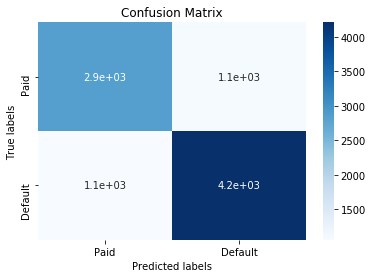

In [757]:
conf_matrix(y_test_bc, y_test_bc1_predict)

## Decision Trees

In [660]:
# Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [661]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_c, y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [664]:
y_preds_clf = clf.predict(X_test_c)

print('Accuracy: ', accuracy_score(y_test_c, y_preds_clf))

Accuracy:  0.4805561590267217


In [667]:
y_preds_clf = clf.predict(X_train_c)

print('Train Accuracy: ', accuracy_score(y_train_c, y_preds_clf))

Train Accuracy:  0.9955096867644396


In [666]:
clf.get_depth()

41

In [ ]:
# param_grid_clf = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [20, 40, 60],
# }

# gs_tree = GridSearchCV(clf, param_grid, cv=3)
# gs_tree.fit(train_data, train_labels)

# gs_tree.best_params_

In [671]:
clf_15 = DecisionTreeClassifier(max_depth=15)
clf_15.fit(X_train_c, y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [675]:
y_preds_clf_15 = clf_15.predict(X_test_c)

print('Accuracy: ', accuracy_score(y_test_c, y_preds_clf_15))

ytrain_preds_clf_15 = clf_15.predict(X_train_c)

print('Train Accuracy: ', accuracy_score(y_train_c, ytrain_preds_clf_15))

Accuracy:  0.5255268303280469
Train Accuracy:  0.6928480898062647


In [674]:
clf_10 = DecisionTreeClassifier(max_depth=10)
clf_10.fit(X_train_c, y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [676]:
y_preds_clf_10 = clf_10.predict(X_test_c)
print('Accuracy: ', accuracy_score(y_test_c, y_preds_clf_10))

ytrain_preds_clf_10 = clf_10.predict(X_train_c)
print('Train Accuracy: ', accuracy_score(y_train_c, ytrain_preds_clf_10))

Accuracy:  0.5360634368889854
Train Accuracy:  0.5859858772406301


In [700]:
clf_b = DecisionTreeClassifier()

clf_b.fit(X_train_c, y_train_bc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [701]:
y_preds_clf_b = clf_b.predict(X_test_c)

print('Accuracy: ', accuracy_score(y_test_bc, y_preds_clf_b))

Accuracy:  0.7381055833152292


In [702]:
ytrain_preds_clf_b = clf.predict(X_train_c)

print('Train Accuracy: ', accuracy_score(y_train_bc, ytrain_preds_clf_b))

Train Accuracy:  0.9983342386384212


In [703]:
clf_b.get_depth()

65

## Bagged Trees

In [697]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [698]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=30), 
                                 n_estimators=20)

In [704]:
bagged_tree.fit(X_train_c, y_train_bc)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=20,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [706]:
# Training accuracy score
bagged_tree.score(X_train_c, y_train_bc)

0.9164222342929568

In [707]:
# Test accuracy score
bagged_tree.score(X_test_c, y_test_bc)

0.8131653269606778

In [754]:
X_train_c.columns

Index(['host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bedrooms', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       ...
       'last_review_2011', 'last_review_2012', 'last_review_2013',
       'last_review_2014', 'last_review_2015', 'last_review_2016',
       'last_review_2017', 'last_review_2018', 'last_review_2019',
       'last_review_2020'],
      dtype='object', length=298)

## Random Forests

In [708]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 30)
forest.fit(X_train_c, y_train_bc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [709]:
# Training accuracy score
forest.score(X_train_c, y_train_bc)

0.9405757740358501

In [710]:
# Test accuracy score
forest.score(X_test_c, y_test_bc)

0.8141429502498371

In [714]:
def plot_feature_importances(model):
    n_features = X_train_c.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_c.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

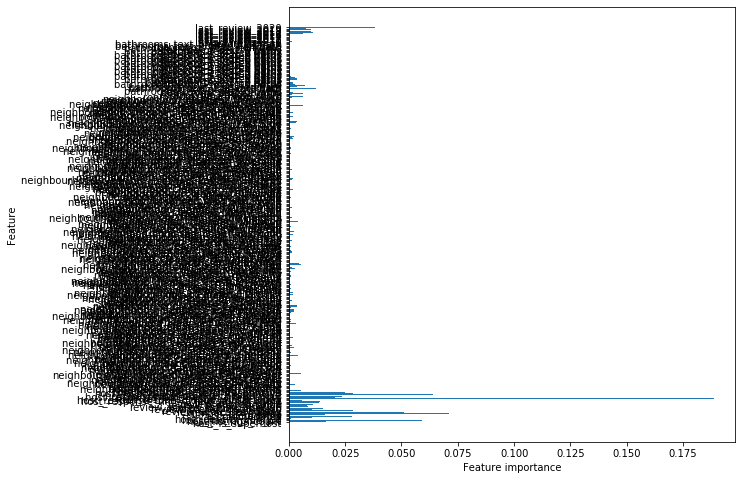

In [715]:
plot_feature_importances(forest)

In [732]:
# Feature importance
forest_feat = pd.DataFrame(forest.feature_importances_)
forest_feat.index = X_train_c.columns.values
forest_feat.columns = ['Feature']

forest_feat.sort_values(by='Feature', ascending=False, inplace=True)

,Feature
host_response_time_did not contact host,0.188750
price,0.071145
host_response_time_within an hour,0.063831
host_listings_count,0.059323
number_of_reviews,0.051331
...,...
bathrooms_text_7 baths,0.000000
neighbourhood_cleansed_Huguenot,0.000000
bathrooms_text_7 shared baths,0.000000
bathrooms_text_5.5 shared baths,0.000000


In [735]:
top_forest_feat = forest_feat.loc[forest_feat['Feature'] > 0.01]

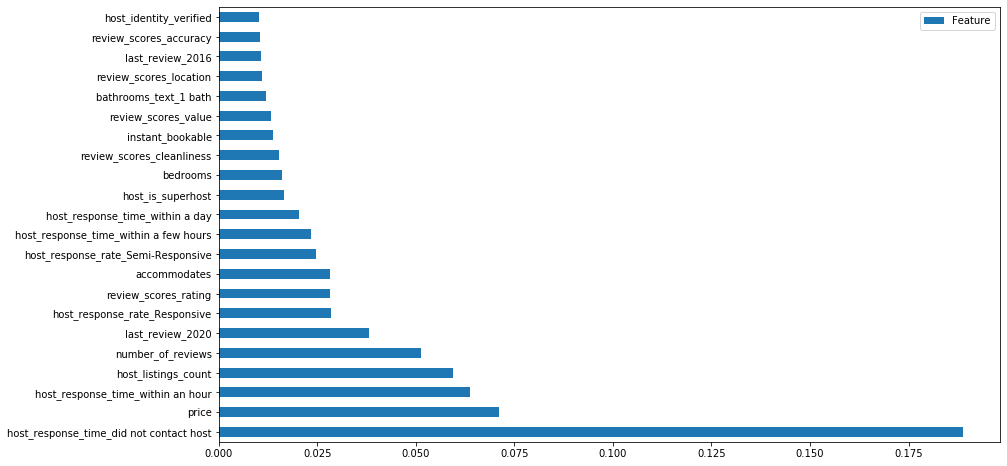

In [745]:
# top_forest_feat
ax = top_forest_feat.plot.barh(figsize=(14,8))

## XG Boost

In [750]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 4.3 MB/s eta 0:00:01


In [751]:
from xgboost import XGBClassifier

In [753]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train_c, y_train_bc)

# Predict on training and test sets
xgb_training_preds = xgb.predict(X_train_c)
xgb_test_preds = xgb.predict(X_test_c)

# Accuracy of training and test sets
xgb_training_accuracy = accuracy_score(y_train_bc, xgb_training_preds)
xgb_test_accuracy = accuracy_score(y_test_bc, xgb_test_preds)

print('Training Accuracy: {:.4}%'.format(xgb_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(xgb_test_accuracy * 100))

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AttributeError: dlsym(0x7fdddb8cdaf0, XGDMatrixSetDenseInfo): symbol not found